# Question 1

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## (a) Analyze the Exasens Data 
Set from https://archive.ics.uci.edu/ml/datasets/Exasens.

Analysis:

1. The dataset contains of extra columns at the end.
2. The dataset contains multiple rows for column names.

So we need to consider these facts while loading dataframe.

## (b) Load the dataset 
in a pandas DataFrame directly from the URL of the dataset.

In [2]:
df_exasens = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00523/Exasens.csv', skiprows=2, usecols=range(9))
df_exasens.columns = ['Diagnosis', 'ID', 'Imaginary_Part_Min', 'Imagniary_Part_Avg', 'Real_Part_Min', 'Real_Part_Avg', 'Gender', 'Age', 'Smoking']

In [3]:
df_exasens

,Diagnosis,ID,Imaginary_Part_Min,Imagniary_Part_Avg,Real_Part_Min,Real_Part_Avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


## (c) Ignore the following columns: Diagnosis and ID

In [4]:
df_exasens = df_exasens.drop(columns=['Diagnosis', 'ID'])

In [5]:
df_exasens

,Imaginary_Part_Min,Imagniary_Part_Avg,Real_Part_Min,Real_Part_Avg,Gender,Age,Smoking
0,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...
394,NaN,NaN,NaN,NaN,0,49,2
395,NaN,NaN,NaN,NaN,0,37,1
396,NaN,NaN,NaN,NaN,0,29,1
397,NaN,NaN,NaN,NaN,1,51,1


In [6]:
df_exasens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Imaginary_Part_Min  100 non-null    float64
 1   Imagniary_Part_Avg  100 non-null    float64
 2   Real_Part_Min       100 non-null    float64
 3   Real_Part_Avg       100 non-null    float64
 4   Gender              399 non-null    int64  
 5   Age                 399 non-null    int64  
 6   Smoking             399 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


## (d) Replace the missing values 
in each column with the average between the median and the mean column value. Example: if a column contains the values 1,2,NaN,1,1 then compute the mean (1.25) and the median (1) and substitute NaN with the average between 1.25 and 1 (1.125). By doing so the column will be 1,2,1.125,1,1.

In [7]:
had_missing = df_exasens.isna().any(axis=1)
for col in df_exasens.columns:
    indices_notna = df_exasens[col].notna()
    df_notna = df_exasens.loc[indices_notna, col]
    new_val = (df_notna.median() + df_notna.mean()) / 2
    df_exasens[col].replace(np.nan, new_val, inplace=True)


In [8]:
df_exasens

,Imaginary_Part_Min,Imagniary_Part_Avg,Real_Part_Min,Real_Part_Avg,Gender,Age,Smoking
0,-320.6100,-300.563531,-495.2600,-464.171991,1,77,2
1,-325.3900,-314.750360,-473.7300,-469.263140,0,72,2
2,-323.0000,-317.436056,-476.1200,-471.897667,1,73,3
3,-327.7800,-317.399670,-473.7300,-468.856388,1,76,2
4,-325.3900,-316.155785,-478.5200,-472.869783,0,65,2
...,...,...,...,...,...,...,...
394,-318.9709,-309.553427,-473.3661,-462.918834,0,49,2
395,-318.9709,-309.553427,-473.3661,-462.918834,0,37,1
396,-318.9709,-309.553427,-473.3661,-462.918834,0,29,1
397,-318.9709,-309.553427,-473.3661,-462.918834,1,51,1


In [9]:
df_exasens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Imaginary_Part_Min  399 non-null    float64
 1   Imagniary_Part_Avg  399 non-null    float64
 2   Real_Part_Min       399 non-null    float64
 3   Real_Part_Avg       399 non-null    float64
 4   Gender              399 non-null    int64  
 5   Age                 399 non-null    int64  
 6   Smoking             399 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


## (e) Display a scatter plot 
for each distinct pair of columns (e.g. for 'Immaginary_Part_Min' and 'Real_Part_Max' , for 'Real_Part_Min' and 'Age' , etc). Distinguish by color between instances that originally had at least one missing value and those that did not have any missing value.

Index(['Imaginary_Part_Min', 'Imagniary_Part_Avg', 'Real_Part_Min',
       'Real_Part_Avg', 'Gender', 'Age', 'Smoking'],
      dtype='object')
21
(21,)


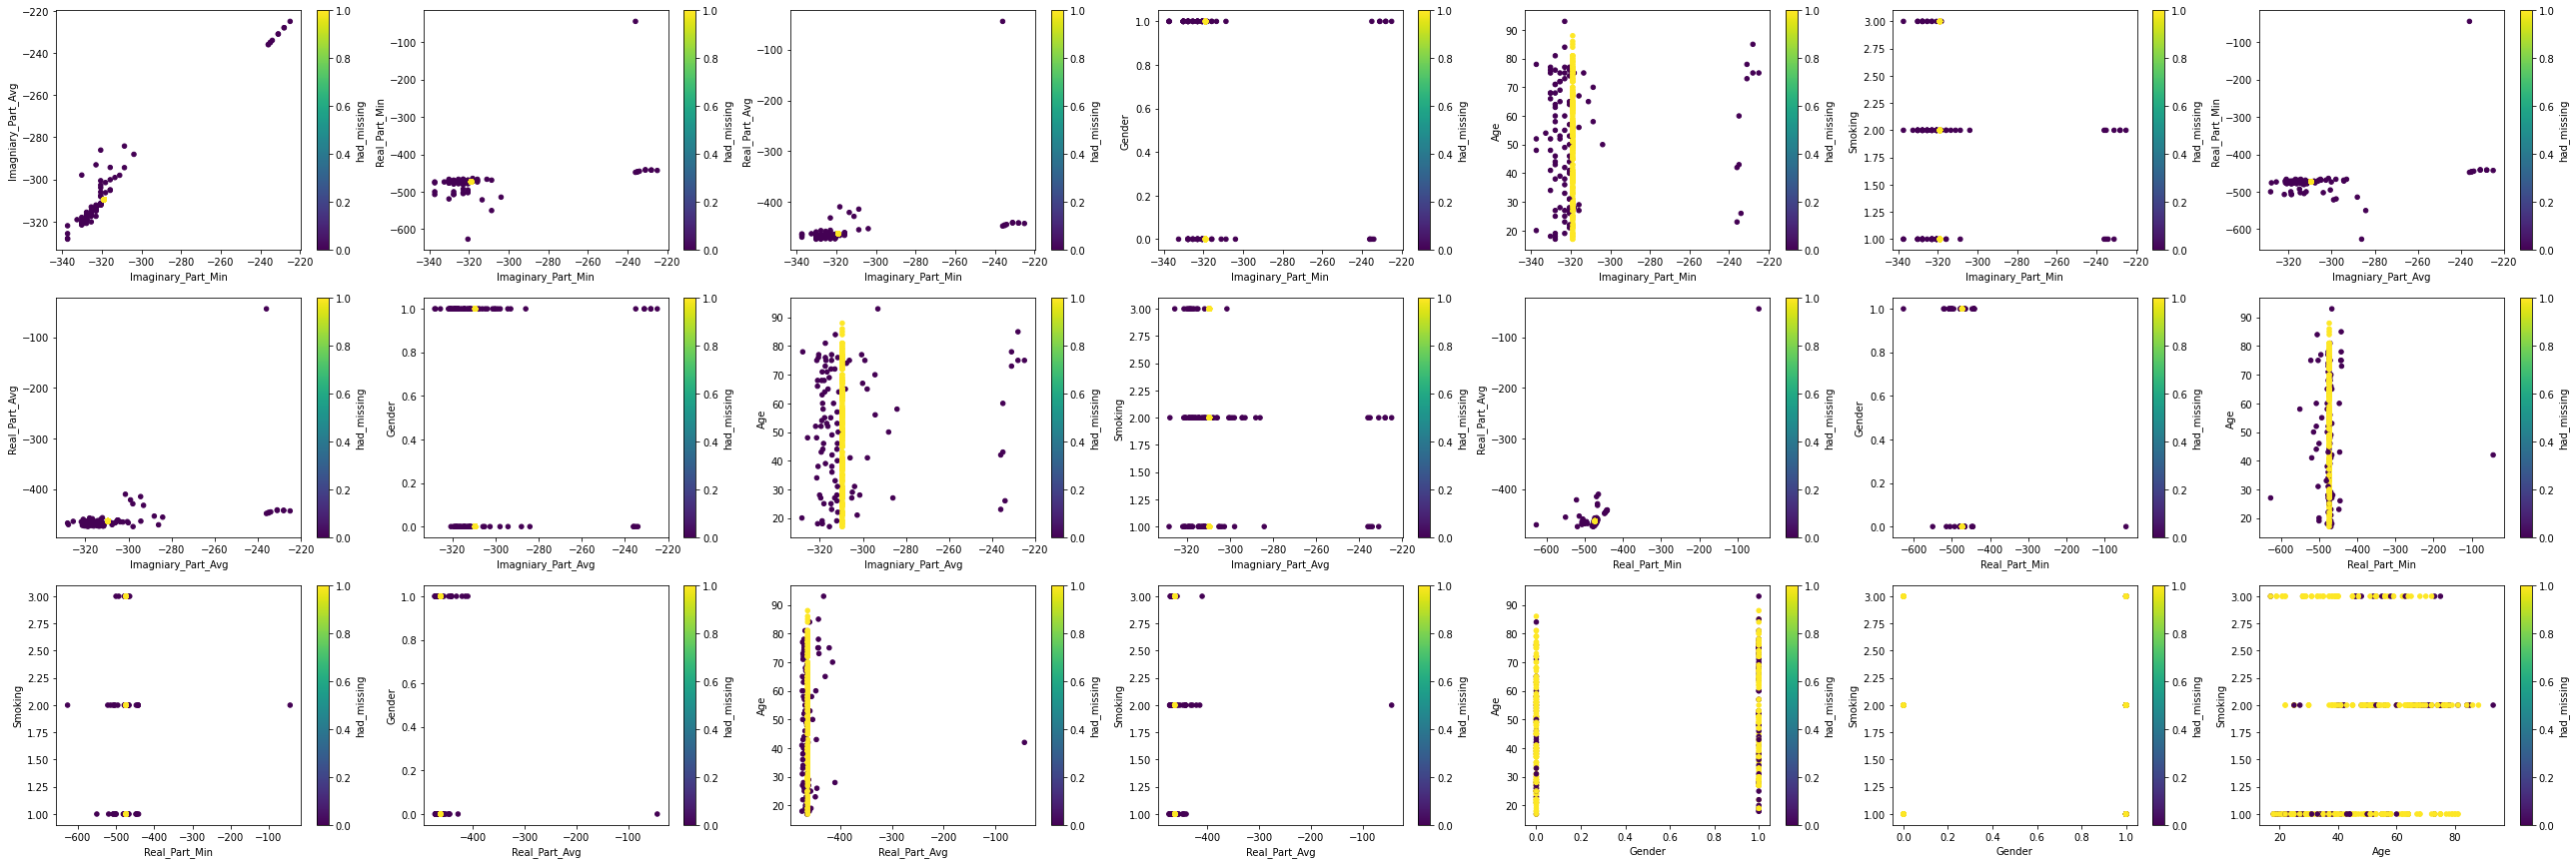

In [10]:
df_exasens['had_missing'] = had_missing
df_exasens['had_missing'] = df_exasens['had_missing'].astype(int)
cols = df_exasens.columns[:-1]
print(cols)
total_plots = sum([i for i in range(1, len(cols))])
print(total_plots)

fig, axes = plt.subplots(figsize=(45, 15), nrows=int(np.ceil(total_plots // 7)), ncols=7)
axes = axes.flatten()
print(axes.shape)
plot_index = 0

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        df_exasens.plot.scatter(x=cols[i], y=cols[j], c='had_missing', colormap='viridis', ax=axes[plot_index])
        plot_index += 1


---

# Question 2

## Import Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from sklearn.datasets import load_iris


In [12]:
X, y = load_iris(return_X_y=True)
print('X:', X.shape)
print('y:', y.shape)

X: (150, 4)
y: (150,)


## (a) Collect all instances 
belonging to the same class in distinct data matrices.

In [13]:
np.unique(y)

array([0, 1, 2])

In [14]:
X_0 = X[y == 0]
print('X_0:', X_0.shape)
X_1 = X[y == 0]
print('X_1:', X_1.shape)
X_2 = X[y == 0]
print('X_2:', X_2.shape)

X_0: (50, 4)
X_1: (50, 4)
X_2: (50, 4)


## (b) Write your own code to perform PCA 
(i.e. do not use functions provided by the scikit library, such as sklearn.decomposition.PCA or sklearn.decomposition.TruncatedSVD).

Text(0.5, 1.0, 'Correlation Matrix')

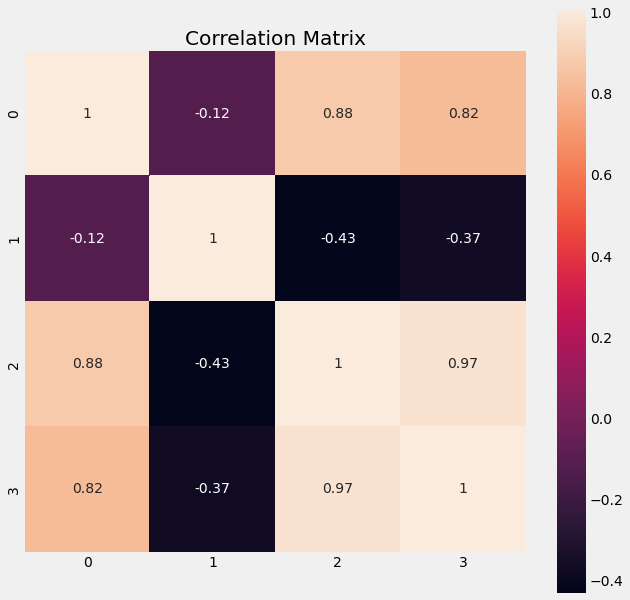

In [15]:
X_z = (X - X.mean(axis=0)) / X.std(axis=0)
covariance_matrix = np.cov(X_z.T)
plt.figure(figsize=(10,10))
sns.heatmap(covariance_matrix, square=True, annot=True)
plt.title('Correlation Matrix')

In [16]:
def CustomPCA_2D(X):
    # Step-1: Perform Normalization
    X_z = (X - X.mean(axis=0)) / X.std(axis=0)

    # Step-2: Calculate Covariance Matrix
    X_shifted = X_z - X_z.mean(axis=0)
    covariance_matrix = X_shifted.T.dot(X_shifted) / len(X_shifted)
    # print('[covariance_matrix]\n', covariance_matrix)

    # Step-3: Calculate Eigen Vectors and Eigen Values
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    indices = np.argsort(eigen_values)[::-1]
    # print('[indices]\n', indices)
    eigen_values, eigen_vectors = eigen_values[indices], eigen_vectors[indices]
    # print('[eigen_values]\n', eigen_values)
    # print('[eigen_vectors]\n', eigen_vectors)

    # Step-4: Transform data matrix X by top 2 eigen_vectors
    X_2D = X @ eigen_vectors.T[:, :2]
    # print('[X, X_2D]', X.shape, X_2D.shape)

    return X_2D


In [17]:
X_2D = CustomPCA_2D(X)

## (c) Display a scatter plot in 2D 
of the Iris dataset using your pca function and distinguishing instances belonging to different classes by color.

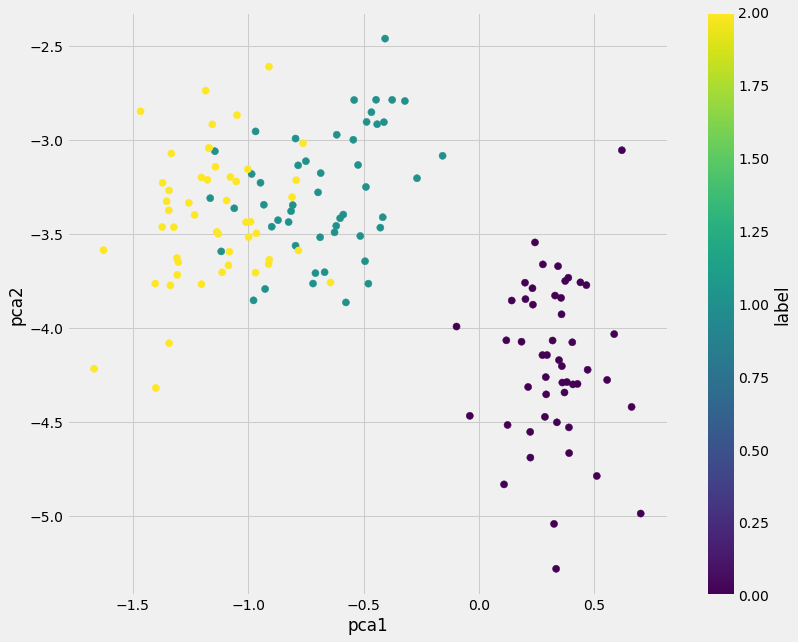

In [18]:
df_plot = pd.DataFrame({'pca1': X_2D[:, 0], 'pca2': X_2D[:, 1], 'label': y})
df_plot.plot.scatter(x='pca1', y='pca2', c='label', s=50, colormap='viridis', figsize=(12, 10))

## (d) Write your own code to perform a low rank reconstruction 
of a data matrix. The function should take in input the data matrix and an integer to specify the desired rank.

In [19]:
def low_rank_reconstruction(X, rank):
    U, S, V = np.linalg.svd(X)
    # print('[U, S, V]', U.shape, S.shape, V.shape)
    # print('[U]\n', U)
    # print('[S]\n', S)
    # print('[V]\n', V)
    X_reconstruction = U[:, :rank] * S[:rank] @ V[:rank,:]
    return X_reconstruction


In [20]:
Xr_0 = low_rank_reconstruction(X_0, 3)
Xr_1 = low_rank_reconstruction(X_1, 3)
Xr_2 = low_rank_reconstruction(X_2, 3)
print('[Xr_0]', X_0.shape, Xr_0.shape)
print('[Xr_1]', X_1.shape, Xr_1.shape)
print('[Xr_2]', X_2.shape, Xr_2.shape)


[Xr_0] (50, 4) (50, 4)
[Xr_1] (50, 4) (50, 4)
[Xr_2] (50, 4) (50, 4)


## (e) For each instance compute 
the reconstruction error as the length of the difference vector between an original instance and the reconstructed instance. When performing the low rank approximation consider the individual class specific data matrices.

In [21]:
# calculate difference vectors
Xd_0 = X_0 - Xr_0
Xd_1 = X_1 - Xr_1
Xd_2 = X_2 - Xr_2
# calculate reconstruction error (vector length)
Xr_error_0 = (Xd_0 * Xd_0).sum(axis=1)
Xr_error_1 = (Xd_1 * Xd_1).sum(axis=1)
Xr_error_2 = (Xd_2 * Xd_2).sum(axis=1)
print('Xr_error_0:', Xr_error_0.shape)
print('Xr_error_1:', Xr_error_1.shape)
print('Xr_error_2:', Xr_error_2.shape)

Xr_error_0: (50,)
Xr_error_1: (50,)
Xr_error_2: (50,)


## (f) Display a scatter plot in 2D 
of the Iris dataset using your pca function and encoding the magnitude of the reconstruction error when rank=3 using the gray scale colormap.

In [22]:
Xr_error = np.hstack((Xr_error_0, Xr_error_1, Xr_error_2))
print('Xr_error:', Xr_error.shape, y.shape)

Xr_error: (150,) (150,)


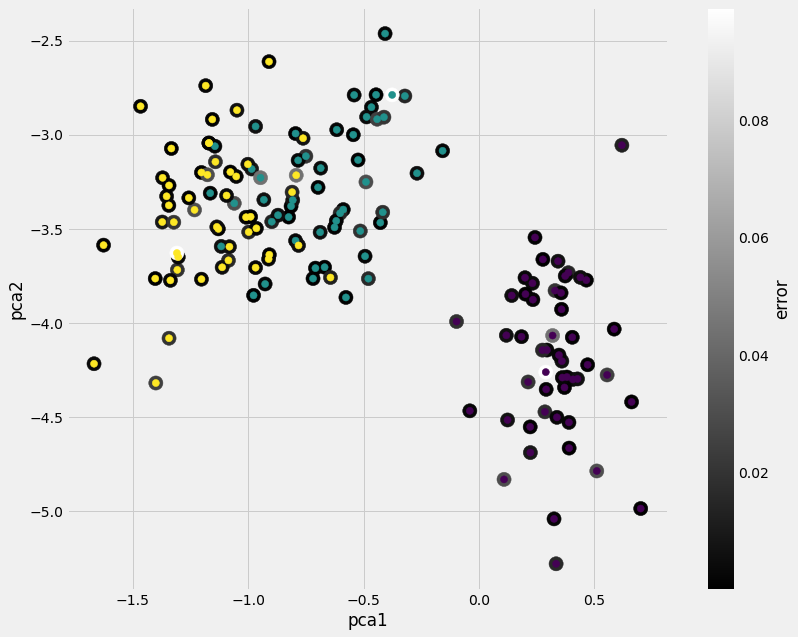

In [23]:
fig, axis_pca = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

# plot with reconstruction error as coloring
df_plot = pd.DataFrame({'pca1': X_2D[:, 0], 'pca2': X_2D[:, 1], 'error': Xr_error})
df_plot.plot.scatter(x='pca1', y='pca2', c='error', s=200, colormap='gray', ax=axis_pca)

# plot with label as coloring
df_plot = pd.DataFrame({'pca1': X_2D[:, 0], 'pca2': X_2D[:, 1], 'label': y})
df_plot.plot.scatter(x='pca1', y='pca2', c='label', s=50, colormap='viridis', ax=axis_pca, colorbar=False)


---

# Question 3

## Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## (a) The means of the data generator 
will lie on the vertices of a regular polygon (if k=3 the polygon is a triangle, if k=6 it is an hexagon, etc). Write your own code to determine the position of the vertices of a regular polygon given a radius value in input. Hint: you can use your knowledge on linear transformations (e.g. rotations).

In [25]:
def get_vertices(k, r):
    vertices = []
    step_t = 2 * np.pi / k
    for t in np.arange(0, 2 * np.pi, step_t):
        x_coord = r * np.cos(t)
        y_coord = r * np.sin(t)
        vertices.append([x_coord, y_coord])
    return vertices

# plt.figure(figsize=(6, 6))
# ax = plt.subplot(1, 1, 1)
# ax.scatter(*get_vertices(3, 1))
# ax.scatter(*get_vertices(4, 1))
# ax.scatter(*get_vertices(5, 1))
# ax.scatter(*get_vertices(6, 1))


## (b) The covariance matrices 
will be constructed by specifying 2 parameters: a ratio between the two main directions of variability (if the ratio is, say, 2:1, then the parameter is 2); and a rotation in degrees (i.e. 90 for a right angle) to determine the main direction of variability.

In [26]:
def get_cov_matrix(ratio, rotation):
    theta = np.radians(rotation)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    S = np.diag([ratio, 1])
    L = S**2
    cov_matrix = R @ L @ R.T
    return cov_matrix


In [27]:
get_cov_matrix(2, 45)

array([[2.5, 1.5],
       [1.5, 2.5]])

## (c) Using the results from the previous 
points, write your own function `data_matrix, targets = make_data(k, num_instances, radius, ratio)` to generate a data matrix with num_instances rows and 2 columns and a targets vector of length num_instances containing a class indicator for each instance (i.e. an integer between 0 and k-1). The function takes in input the number of classes k , the total number of instances num_instances , the parameter radius to express the distance from the origin for the means of the multi variate normal data generators, and finally the ratio between the two main directions of variability to determine the covariance matrices for the multi variate normal data generators.
Important: For each one of the k multi variate normal data generator, sample the rotation parameter uniformly at random between 0 and 360.

In [28]:
def make_data(k, num_instances, radius, ratio):
    data_matrix, targets = np.zeros((0, 2)), np.zeros((0))
    mean = get_vertices(k, radius)
    # print('[mean]', mean)
    k_instances = int(num_instances / k)
    # print('[k_instances]', k_instances)

    for i in range(k):
        rotation = np.random.uniform(0, 361)
        cov = get_cov_matrix(ratio, rotation)
        # print('[cov]\n', cov)
        X_sampled = np.random.multivariate_normal(mean[i], cov, k_instances)
        # print('[X_sampled]\n', X_sampled, X_sampled.shape)
        data_matrix = np.vstack((data_matrix, X_sampled))
        # print('[data_matrix]\n', data_matrix, data_matrix.shape)
        targets = np.hstack((targets, [i] * k_instances))

    return data_matrix, targets.astype('int')


In [29]:
k, num_instances, radius, ratio = 5, 500, 10, 2
data_matrix, targets = make_data(k, num_instances, radius, ratio)
print('data_matrix:', data_matrix.shape)
print('targets:', targets.shape)

data_matrix: (500, 2)
targets: (500,)


In [30]:
# mean = [0, 0]
# cov = [[2.5, 1.5], [1.5, 2.5]]  # diagonal covariance
# x, y = np.random.multivariate_normal(mean, cov, 5000).T
# plt.plot(x, y, 'x')
# plt.axis('equal')
# plt.show()

## (d) Display a scatter plot in 2D 
of the generated dataset distinguishing instances belonging to different classes by color.

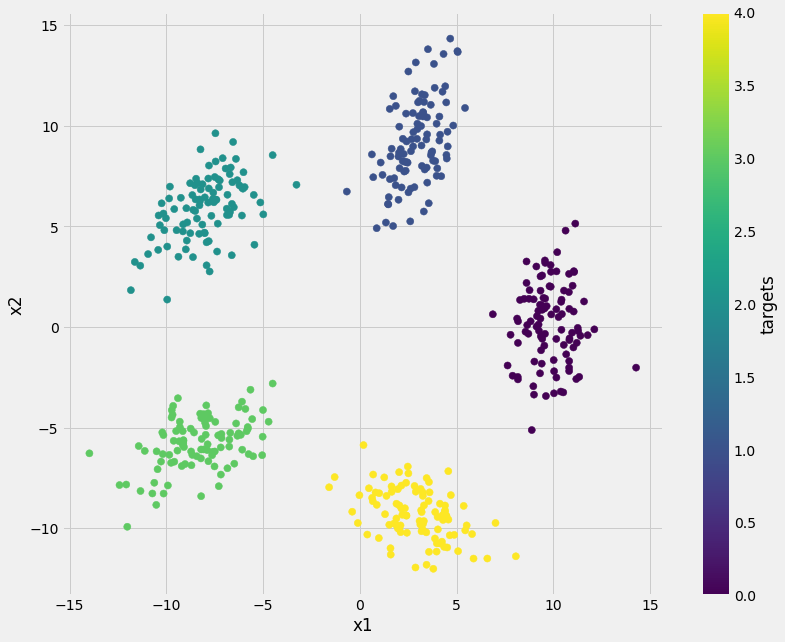

In [31]:
df_plot = pd.DataFrame({'x1': data_matrix[:, 0], 'x2': data_matrix[:, 1], 'targets': targets})
df_plot.plot.scatter(x='x1', y='x2', c='targets', s=50, colormap='viridis', figsize=(12, 10))

## (e) Write the function params = fit_LDA(data_matrix,targets)
The function outputs the parameters for a LDA classifier fit for the classification of the required number of classes. The number of classes will be automatically deduced from the targets vector.

In [32]:
def fit_LDA(data_matrix, targets):
    # define basic variables
    n_samples, n_features = data_matrix.shape
    classes = np.unique(targets)
    n_classes = len(classes)
    # calculate maximum number of components
    max_components = min(n_classes - 1, n_features)

    # calculate means of each class
    means = np.array([np.mean(data_matrix[targets == c], axis=0) for c in classes])
    # calculate mean of whole dataset
    mean_dataset = np.mean(data_matrix, axis=0)

    # center data points by subtracting the mean vector corresponding to it's class
    Xc = [data_matrix[targets == c, :] - means[idx] for idx, c in enumerate(classes)]
    Xc = np.concatenate(Xc, axis=0)

    # calculate std across each feature axis
    std = Xc.std(axis=0)
    # normalization factor
    fac = 1.0 / (n_samples - n_classes)

    # normalize by performing within class variance scaling
    X = np.sqrt(fac) * (Xc / std)
    # SVD of centered (within) scaled data
    U, S, Vt = np.linalg.svd(X, full_matrices=False)

    # find rank of S
    rank = np.sum(S > 1e-4)
    # scaling of within covariance is: V' 1/S
    scalings = (Vt[:rank] / std).T / S[:rank]
    # normalization factor
    fac = 1.0 / (n_classes - 1)

    # calculate class priors
    priors = np.array([len(targets[targets == c]) / float(len(targets)) for c in classes])

    # calculate between class variance scaling, scale weighted centers
    X = np.dot(((np.sqrt((n_samples * priors) * fac)) * (means - mean_dataset).T).T, scalings)
    U, S, Vt = np.linalg.svd(X, full_matrices=0)

    # find rank of S
    rank = np.sum(S > 1e-4 * S[0])
    scalings = np.dot(scalings, Vt.T[:, :rank])
    coef = np.dot(means - mean_dataset, scalings)
    coefficients = np.dot(coef, scalings.T)
    intercept = -0.5 * np.sum(coef**2, axis=1) + np.log(priors)
    intercept -= np.dot(mean_dataset, coefficients.T)

    params = {'coefficients': coefficients, 'intercept': intercept}
    return params


In [33]:
params = fit_LDA(data_matrix, targets)
print('params:', params)

params: {'coefficients': array([[ 4.50018282, -0.78942099],
       [ 0.60636637,  3.11432562],
       [-4.06498004,  2.82957065],
       [-3.21682327, -1.45183066],
       [ 2.17525411, -3.70264462]]), 'intercept': array([-23.38806865, -16.82512488, -26.46374655, -19.31061132,
       -21.89708505])}


## (f) Write the function predictions = test_LDA(data_matrix, params) 
to output the class predicted by the LDA model encoded in param.

In [34]:
def test_LDA(data_matrix, params):
    pred_scores = (data_matrix @ params['coefficients'].T) + params['intercept']
    probabilities = np.exp(pred_scores) / np.sum(np.exp(pred_scores), axis=1).reshape(-1, 1)
    pred_class = np.argmax(probabilities, axis=1)
    return pred_class


## (g) Write a function make_grid 
to generate instances regularly spaced in 2D. The function should allow the user to specify the grid density, i.e. how many points to generate.

In [35]:
def make_grid(points):
    grid = []
    for y in np.linspace(-15, 15, points):
        for x in np.linspace(-15, 15, points):
            grid.append([x, y])
    grid = np.array(grid)
    return grid


In [36]:
make_grid(100).shape

(10000, 2)

## (h) Generate 500 instances for 5 classes 
with radius 10 and ratio 2. Fit an LDA model. Generate a grid dataset that covers the original data set. Display a scatter plot in 2D of the grid dataset distinguishing instances belonging to different predicted classes by color.

In [37]:
k, num_instances, radius, ratio = 5, 500, 10, 2
data_matrix, targets = make_data(k, num_instances, radius, ratio)
print('data_matrix:', data_matrix.shape)
print('targets:', targets.shape)

data_matrix: (500, 2)
targets: (500,)


In [38]:
params = fit_LDA(data_matrix, targets)
print('params:', params)

params: {'coefficients': array([[ 3.78888189,  1.47603184],
       [ 2.57179202,  7.04323556],
       [-2.2593398 ,  2.80068826],
       [-3.92535268, -5.23021243],
       [-0.17598142, -6.08974323]]), 'intercept': array([-20.18003476, -39.0904149 , -18.78967663, -32.83498746,
       -30.57197578])}


In [39]:
data_grid = make_grid(100)
outputs = test_LDA(data_grid, params)
print('outputs:', outputs.shape)

outputs: (10000,)


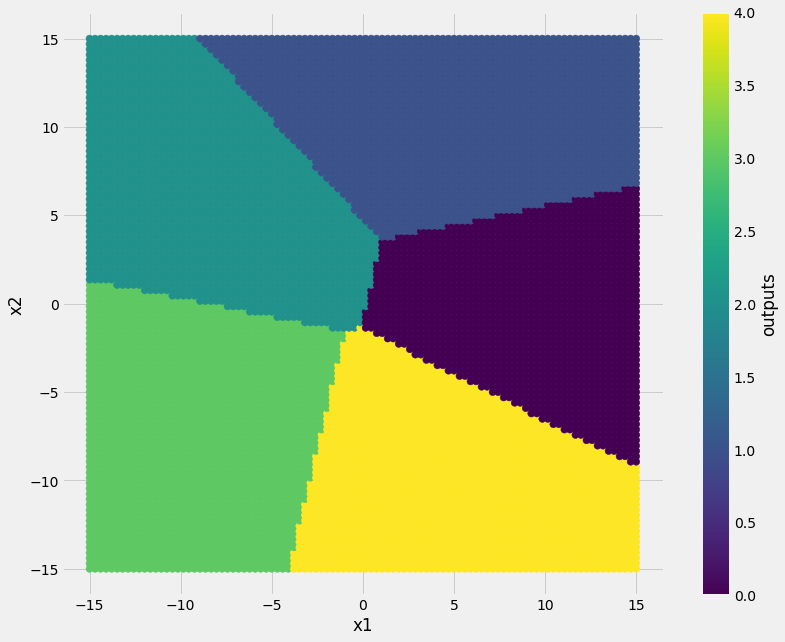

In [40]:
df_plot = pd.DataFrame({'x1': data_grid[:, 0], 'x2': data_grid[:, 1], 'outputs': outputs})
df_plot.plot.scatter(x='x1', y='x2', c='outputs', s=50, colormap='viridis', figsize=(12, 10))

---